In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:
base_dir="/content/drive/MyDrive/mini_project dataset/dataset"

In [ ]:
height = 228
width = 228
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [ ]:
IMAGE_SIZE = 228
BATCH_SIZE = 32

# Pre-processing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

val_data = test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 1150 images belonging to 4 classes.
Found 126 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# load pre-trained InceptionV3
pre_trained = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape, pooling='avg')

for layer in pre_trained.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
num_classes=4

In [ ]:
x = pre_trained.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs = pre_trained.input, outputs = predictions)
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 228, 228, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 113, 113, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 113, 113, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size

history = model.fit_generator(train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = val_data,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = 7,
                    verbose = 1)

<ipython-input-11-3fd0eacdfb63>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data,


Epoch 1/7
35/35 [==============================] - 263s 7s/step - loss: 0.8350 - accuracy: 0.8184 - val_loss: 0.7382 - val_accuracy: 0.7708
Epoch 2/7
35/35 [==============================] - 189s 5s/step - loss: 0.5892 - accuracy: 0.8569 - val_loss: 0.5011 - val_accuracy: 0.8333
Epoch 3/7
35/35 [==============================] - 195s 6s/step - loss: 0.4262 - accuracy: 0.8891 - val_loss: 0.5658 - val_accuracy: 0.8125
Epoch 4/7
35/35 [==============================] - 191s 5s/step - loss: 0.4159 - accuracy: 0.8971 - val_loss: 0.7763 - val_accuracy: 0.8021
Epoch 5/7
35/35 [==============================] - 188s 5s/step - loss: 0.3532 - accuracy: 0.9097 - val_loss: 0.5561 - val_accuracy: 0.8438
Epoch 6/7
35/35 [==============================] - 185s 5s/step - loss: 0.2573 - accuracy: 0.9311 - val_loss: 0.5093 - val_accuracy: 0.8542
Epoch 7/7
35/35 [==============================] - 185s 5s/step - loss: 0.2514 - accuracy: 0.9222 - val_loss: 0.4958 - val_accuracy: 0.8333


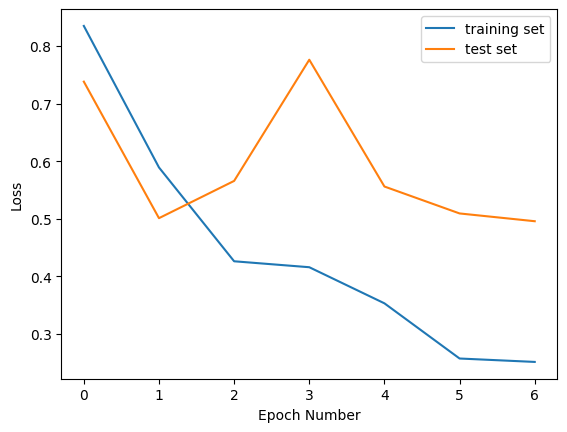

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='test set')
plt.legend()

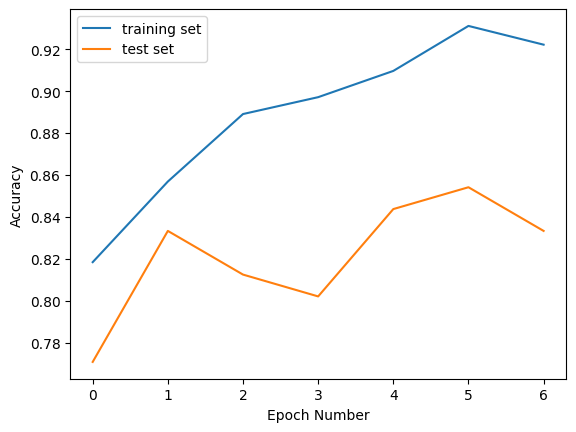

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
model_name = 'inceptionV3.h5'
model.save(model_name, save_format='h5')

In [ ]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [ ]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

1/1 [==============================] - 0s 240ms/step


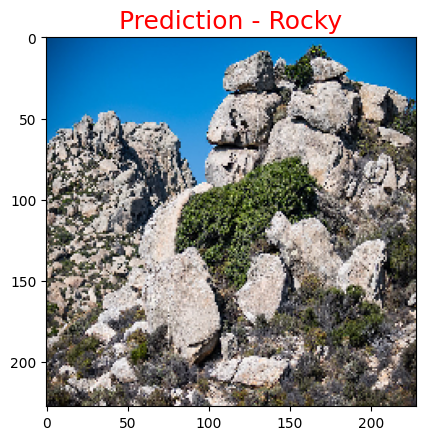

In [ ]:
predict_image('/content/drive/MyDrive/mini_project dataset/rock.jpg', model)